# LINEAR REGRESSION - GEELY AUTO

## Step 1: Importing and Understanding Data

In [257]:
# Supress the warnings
import warnings
warnings.filterwarnings('ignore')

In [258]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [259]:
# Importing CarPrice_Assignment.csv
path2 = r'D:\Data science\c2AssmtLR'
os.chdir(path2)
car_df = pd.read_csv('CarPrice_Assignment.csv')

Checking various aspects

In [260]:
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [261]:
car_df.shape

(205, 26)

In [262]:
#### car_df.info #info is a function so it has to have a parentheses
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [263]:
car_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Step 2: Data Preparation

- Since the CarName consists of two parts - first car company and second model name or number, we extract only the car company name from CarName variable and drop the CarName variable as it is not necessary.
- Check for any null values and dropping columns that are not necessary.

In [264]:
# Seperating the company name
comp = car_df["CarName"].str.split(" ", n=1, expand = True) 

# Creating new column with car companies only
car_df["Company"] = comp[0]

# Dropping CarName variable as only car company will be considered
car_df.drop(['CarName'], axis=1, inplace = True)
car_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [265]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg       

In [266]:
car_df.Company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

There are some car companies duplicates which are mispelled and with upper case. We will replace them with correct company name
>Replacing the names as follows:
 - maxda to mazda 
 - Nissan to nissan
 - porcshce to porsche
 - vokswagen and vw to volkswagen
 - toyouta to toyota

In [267]:
# Changing company names to lowercase
car_df['Company'] = car_df.Company.str.lower()

In [268]:
# Updating the misspelled company names as above using dictionary
car_replace = {'maxda':'mazda', 'porcshce':'porsche', 'vokswagen':'volkswagen', 'vw':'volkswagen', 'toyouta':'toyota'}
car_df = car_df.replace({'Company':car_replace})

In [269]:
car_df.Company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

The data is prepared and no null values are found, we can now visualise the data

## Step 3: Data Visualising

Now let's **Understand the data** more with the help of visualising.
- Check if there is some multicollinearity going on.
- To identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

We will take car price as the dependent variable here. 

In [271]:
# Checking the price variable
car_df.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

**Visualising the car price**

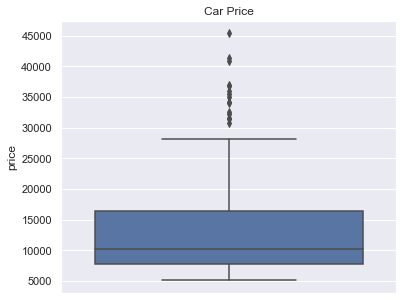

In [329]:
plt.figure(figsize=(6,5))
plt.title("Car Price")
sns.boxplot(y= 'price', data = car_df)

- From the boxplot we can see that the data points are spread out vastly and there are high outliers.
- 75% of the data points lie below 20000 while the outlier lie upto 45000 with rest of the data points spread inbetween which shows high variance.
- Also the mean value is closer to the 75th percentile.

##### Visualising Numerical Variables

We will visualise the numerical variables with respect to car price using pairplot.

In [273]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg       

In [330]:
num = ['float64', 'int64']
print(car_df.select_dtypes(include=num).columns.tolist())

['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


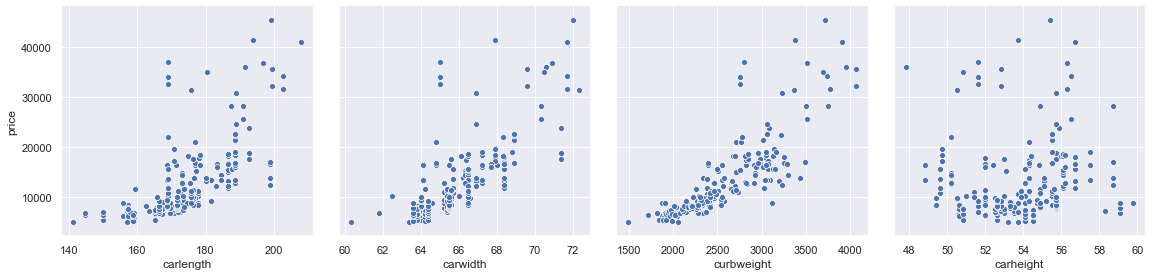

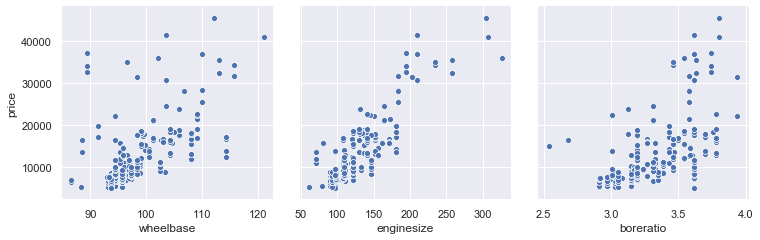

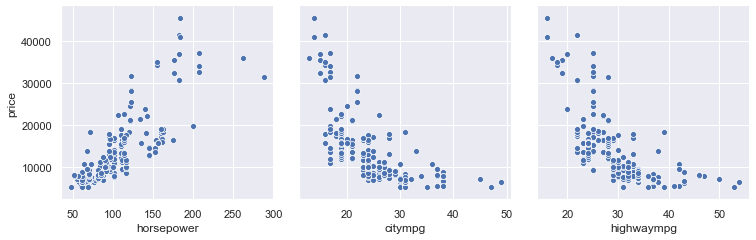

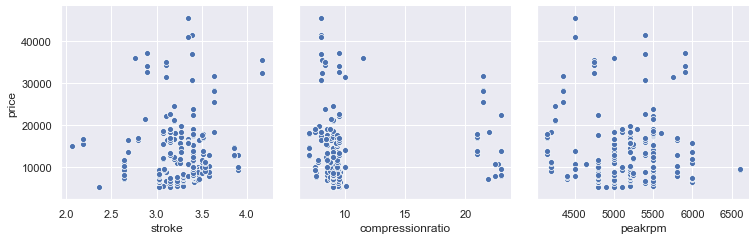

In [331]:
# Checking for a trend in the numerical variables using pairplot

sns.pairplot(car_df, x_vars=['carlength', 'carwidth', 'curbweight', 'carheight'], y_vars='price', 
             size=4, kind='scatter', aspect=1)

sns.pairplot(car_df, x_vars=['wheelbase','enginesize','boreratio'], y_vars='price', size=3.5, kind='scatter', aspect=1)

sns.pairplot(car_df, x_vars=['horsepower', 'citympg', 'highwaympg'], y_vars='price', size=3.5, kind='scatter', aspect=1)

sns.pairplot(car_df, x_vars=['stroke', 'compressionratio', 'peakrpm'], y_vars='price', size=3.5, kind='scatter', aspect=1)


From the above plots we can infer:
- `Carlength`, `carwidth`, `curbweight`, `wheelbase`, `enginesize`, `boreratio` and `horsepower` have a significant positve trend with price.
- `Carheight`, `stroke`, `compression ratio` and `peakrpm` does not show any trends.
- Also, `citympg` and `highwaympg` exhibits a negative trend with car price which is significant too. 

##### Visualising the Categorical Variable
The categorical variable can be visualised using boxplot and barplots.

In [332]:
# list of categorical variables
cat_col = car_df.select_dtypes(include='object').columns.tolist()
print(cat_col)

['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'Company']


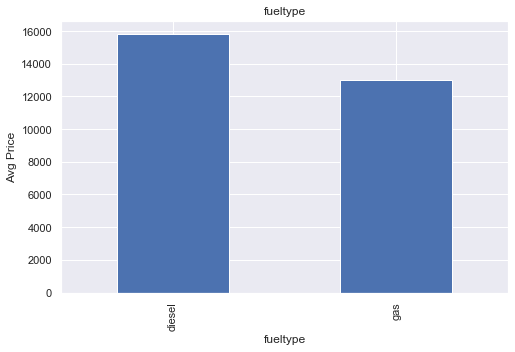

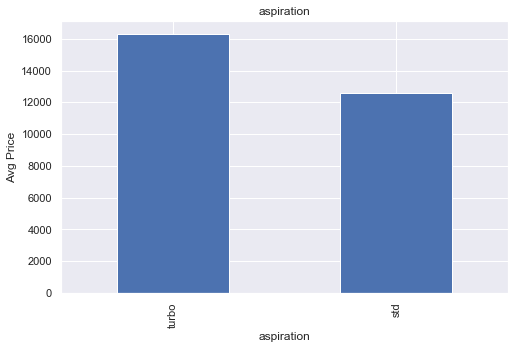

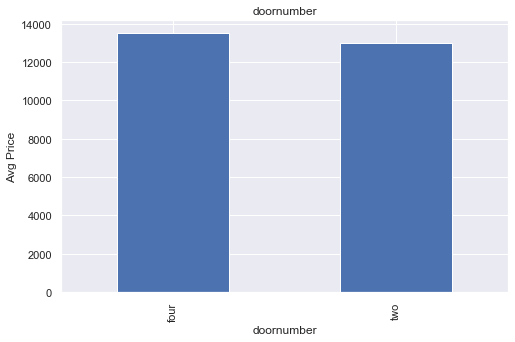

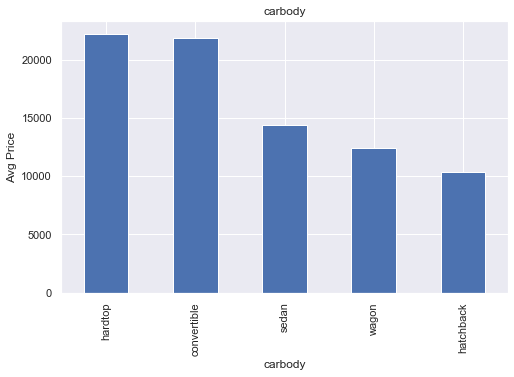

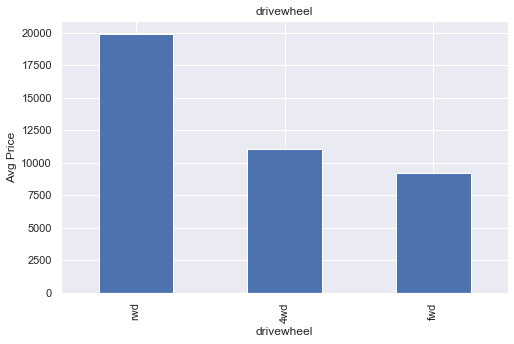

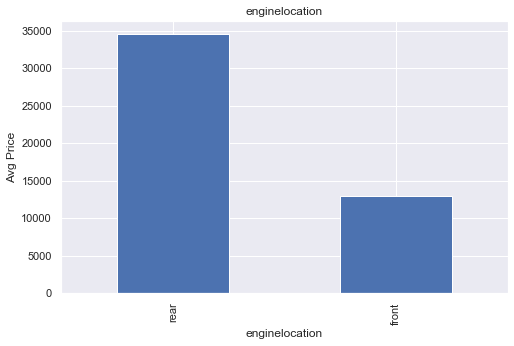

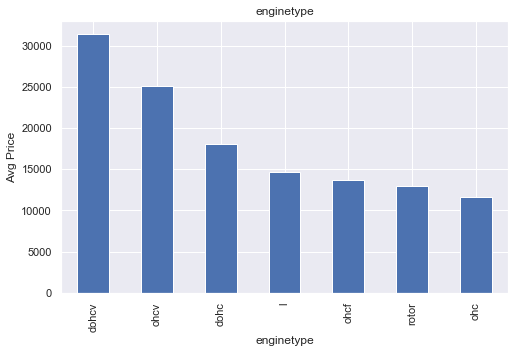

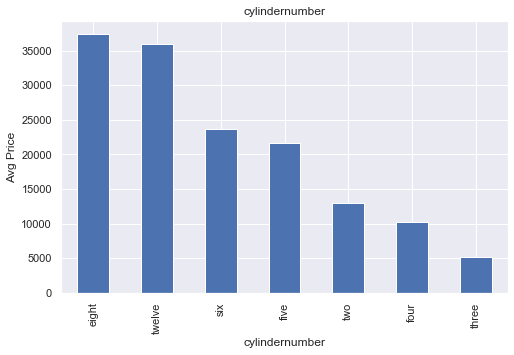

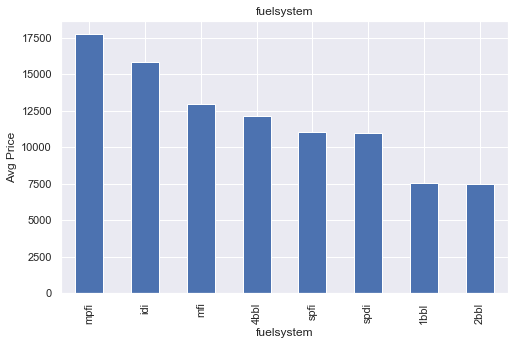

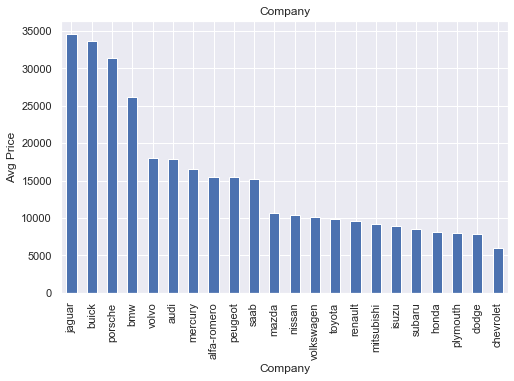

In [335]:
#plt.figure(figsize=(8,5))
for i in cat_col:
    
    plt.figure(figsize=(8,5))
    car_df.groupby(i)['price'].mean().sort_values(ascending=False).plot.bar()
    plt.xticks(rotation=90)
    plt.ylabel("Avg Price")
    plt.title(i)
    plt.show()  

From the plots above, we can see,
- The difference in Average price for `gas` and `diesel`and `turbo` and `std` engine is 3000-4000 
- Avg price for `doornumber` does not have much significance difference.
- On average, `hardtop` and `convertible` carbody has highest price followed by `sedan`.
- Drivewheel price ranges from 8000-20000 with `fwd` costing the most, around 20000.
- `rear` engine costs more than double the cost of `front` engine on average.
- Cars with `eight` number of cylinders tops the price (>35000) whereas that with `three` bottoms(5000).
- Avg price on basis of enginetype decreases exponentially from `dohcv` to `ohc`.
- Different fuelsystems varies from 17500 to 7500.
- `jaguar`, `buick` and `porsche` have the highest avg price and `chevrolet` the least.

Text(0.5, 1.0, 'Company vs Price')

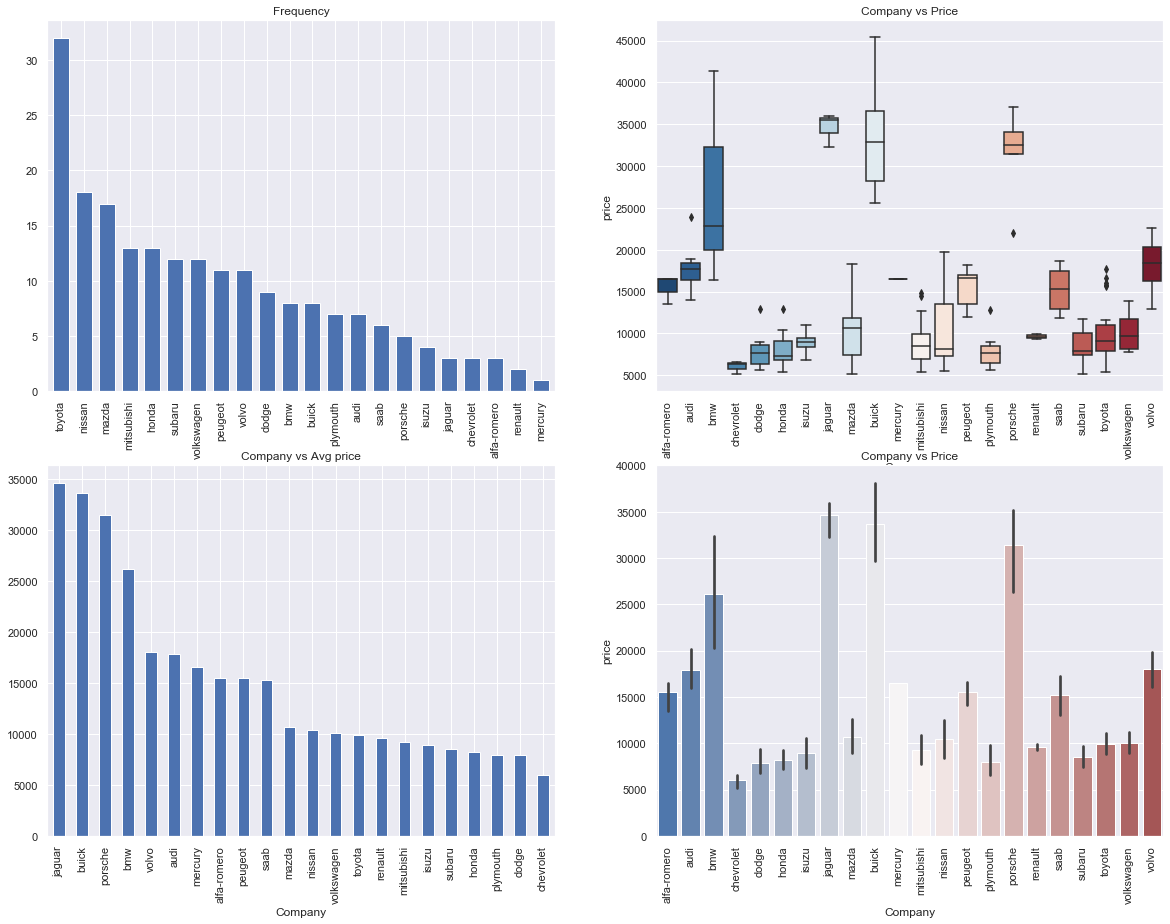

In [336]:
# Visualising Company vs price
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
car_df.Company.value_counts().plot(kind='bar', stacked=True, width =0.7)
plt.title('Frequency')

plt.subplot(2,2,2)
sns.boxplot(x = 'Company', y = 'price', data = car_df, palette="RdBu_r")
plt.xticks(rotation=90)
plt.title('Company vs Price')

plt.subplot(2,2,3)
car_df.groupby('Company')['price'].mean().sort_values(ascending=False).plot.bar()
plt.title('Company vs Avg price')

plt.subplot(2,2,4)
sns.barplot(x = 'Company', y = 'price', data = car_df, palette="vlag")
plt.xticks(rotation=90)
plt.title('Company vs Price')


- Toyota is the most preferred company and has highest sales.
- Jaguar, Buick and porsche has the highest average price with jaguar and buick being the costlier ones.
- Plymouth and chevrolet cost less and are preferred comparatively less by customers.

Text(0.5, 1.0, 'aspiration vs Price')

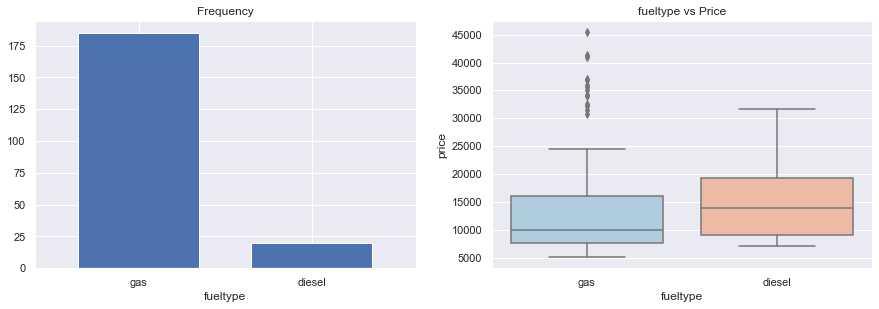

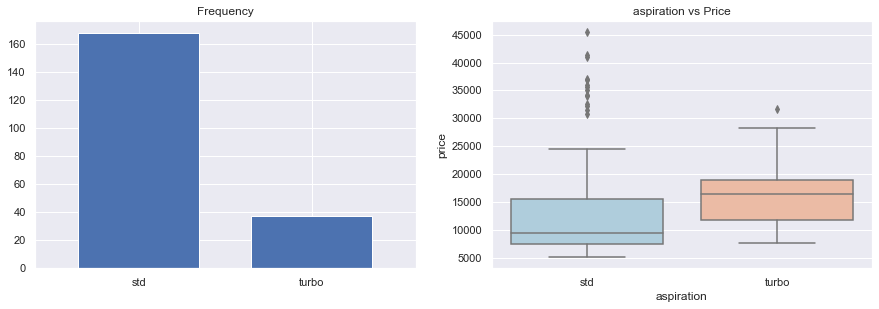

In [337]:
# Fueltype vs price
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
car_df.fueltype.value_counts().plot(kind='bar', stacked=True, width =0.7)
plt.xticks(rotation=0)
plt.xlabel('fueltype')
plt.title('Frequency')

plt.subplot(2,2,2)
sns.boxplot(x = 'fueltype', y = 'price', data = car_df, palette="RdBu_r")
plt.title('fueltype vs Price')

# Aspiration vs price
plt.figure(figsize=(15,10))
plt.subplot(2,2,3)
car_df.aspiration.value_counts().plot(kind='bar', stacked=True, width =0.7)
plt.xticks(rotation=0)
plt.title('Frequency')

plt.subplot(2,2,4)
sns.boxplot(x = 'aspiration', y = 'price', data = car_df, palette="RdBu_r")
plt.title('aspiration vs Price')

- `Gas` fuel is most opted option eventhough both are prices does not differ much.
- The `std` aspiration is most preferred than `turbo` and `turbo` price is slightly higher.

Text(0.5, 1.0, 'doornumber vs Price')

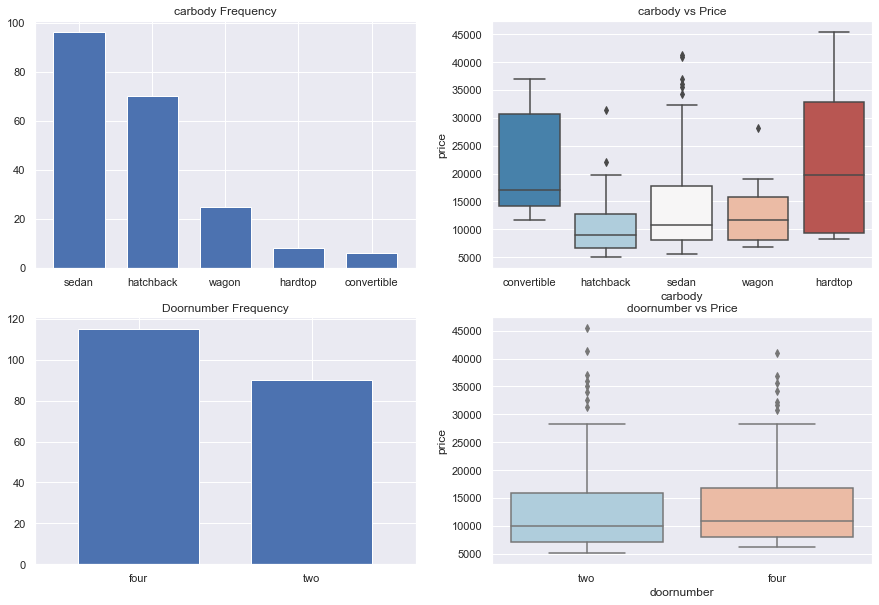

In [338]:
# Carbody and Price
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
car_df.carbody.value_counts().plot(kind='bar', stacked=True, width =0.7)
plt.xticks(rotation=0)
plt.title('carbody Frequency')

plt.subplot(2,2,2)
sns.boxplot(x = 'carbody', y = 'price', data = car_df, palette="RdBu_r")
plt.title('carbody vs Price')

# Number of doors and price
plt.subplot(2,2,3)
car_df.doornumber.value_counts().plot(kind='bar', stacked=True, width =0.7)
plt.xticks(rotation=0)
plt.title('Doornumber Frequency')

plt.subplot(2,2,4)
sns.boxplot(x = 'doornumber', y = 'price', data = car_df, palette="RdBu_r")
plt.title('doornumber vs Price')


- `Sedan` and `hatchback` have more movement. More than 40% of sedan models are high priced.
- There is no much significance in `doornumber`.

Text(0.5, 1.0, 'enginetype vs Price')

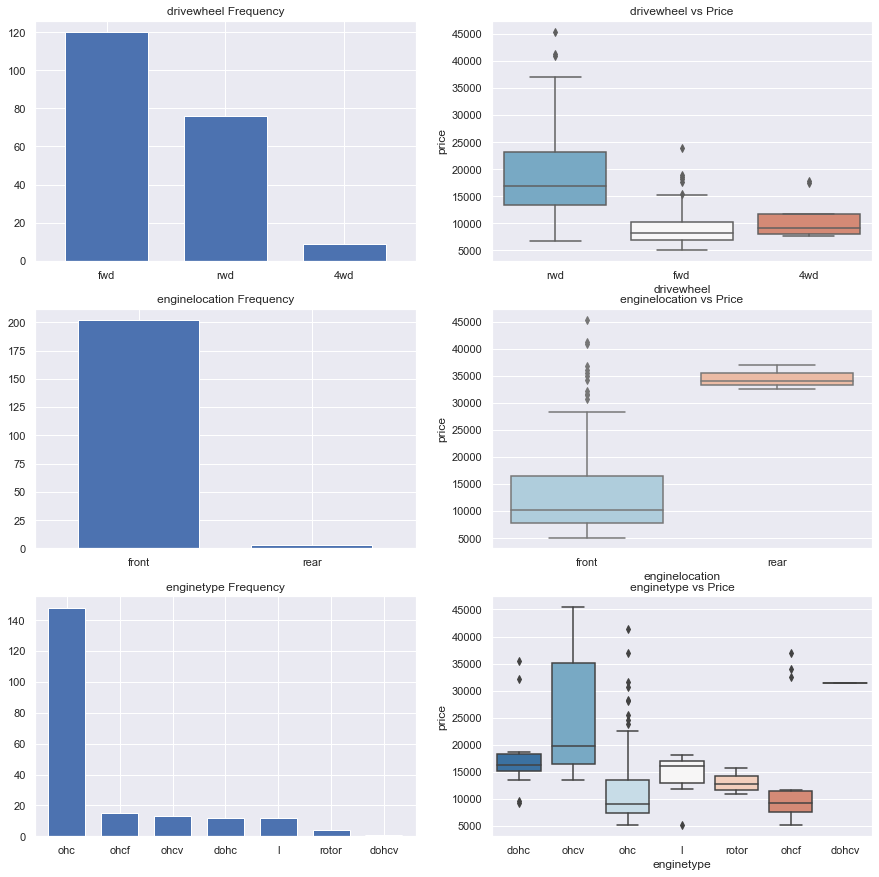

In [339]:
# Drivewheel and Price
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
car_df.drivewheel.value_counts().plot(kind='bar', stacked=True, width =0.7)
plt.xticks(rotation=0)
plt.title('drivewheel Frequency')

plt.subplot(3,2,2)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_df, palette="RdBu_r")
plt.title('drivewheel vs Price')

# Enginelocation and price
plt.subplot(3,2,3)
car_df.enginelocation.value_counts().plot(kind='bar', stacked=True, width =0.7)
plt.xticks(rotation=0)
plt.title('enginelocation Frequency')

plt.subplot(3,2,4)
sns.boxplot(x = 'enginelocation', y = 'price', data = car_df, palette="RdBu_r")
plt.title('enginelocation vs Price')

#Engine type and price
plt.subplot(3,2,5)
car_df.enginetype.value_counts().plot(kind='bar', stacked=True, width =0.7)
plt.xticks(rotation=0)
plt.title('enginetype Frequency')

plt.subplot(3,2,6)
sns.boxplot(x = 'enginetype', y = 'price', data = car_df, palette="RdBu_r")
plt.title('enginetype vs Price')

- Cars with `fwd` drivewheel has higher sales and it also costs less compared to other.
- The `front` located engine is preferred by most there is no or very few buyers for `rear` engines. Cost for `rear` engine is very high.
- `ohc` engine type looks like the favourite for customers. Also it costs more or less than `ohcf` and less than others.

Text(0.5, 1.0, 'fuelsystem vs Price')

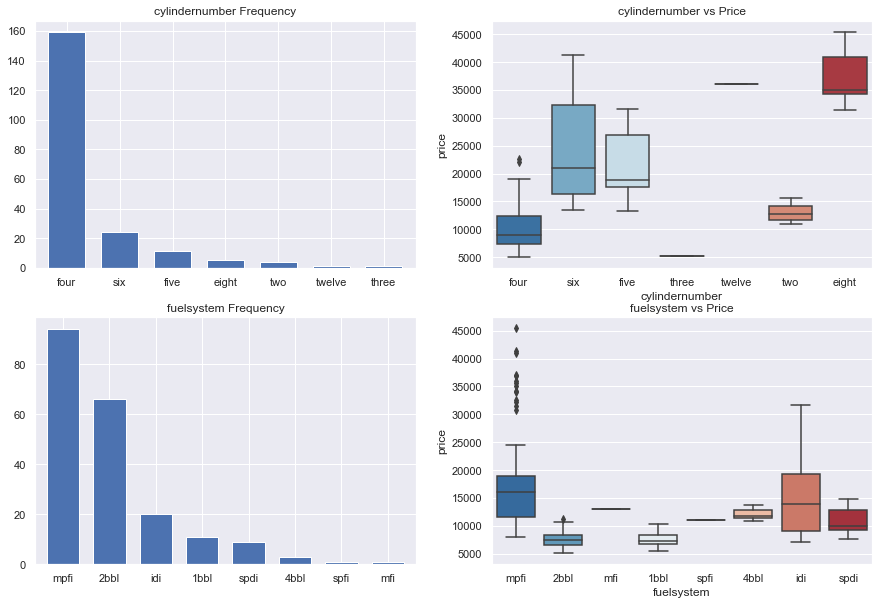

In [340]:
# cylindernumber and Price
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
car_df.cylindernumber.value_counts().plot(kind='bar', stacked=True, width =0.7)
plt.xticks(rotation=0)
plt.title('cylindernumber Frequency')

plt.subplot(2,2,2)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car_df, palette="RdBu_r")
plt.title('cylindernumber vs Price')

# fuelsystem and price
plt.subplot(2,2,3)
car_df.fuelsystem.value_counts().plot(kind='bar', stacked=True, width =0.7)
plt.xticks(rotation=0)
plt.title('fuelsystem Frequency')

plt.subplot(2,2,4)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_df, palette="RdBu_r")
plt.title('fuelsystem vs Price')

- `four` number of cylinders is common. `six`, `,five` and `eight` are also common and they cost very high compared to `four`.
- Fuelsystems `mpfi` and `2bbi` are the most bought ones. `mpfi` is costlier and `2bbi` costs the least after `1bbi1.

After the analysis some significant variables are selected for making the model.
##### Significant variables:
> - Fuelsystem
- Fueltype
- Enginetype
- Drivewheel
- Carbody
- Horsepower
- Citympg
- Highwaympg
- Carlength
- Carwidth
- Curbeweight
- Aspiration
- Cylinder number
- Engine size
- Boreration
- Wheel base

Now we will create a new dataframe with these variables.



In [341]:
car_df.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'Company'],
      dtype='object')

In [342]:
# Creating new dataframe
car_lr = car_df[[ 'price', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase', 'carlength',
       'carwidth', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg']]

car_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg
0,13495.0,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,21,27
1,16500.0,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,21,27
2,16500.0,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,19,26
3,13950.0,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,24,30
4,17450.0,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,18,22


In [343]:
car_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
price             205 non-null float64
fueltype          205 non-null object
aspiration        205 non-null object
carbody           205 non-null object
drivewheel        205 non-null object
wheelbase         205 non-null float64
carlength         205 non-null float64
carwidth          205 non-null float64
curbweight        205 non-null int64
enginetype        205 non-null object
cylindernumber    205 non-null object
enginesize        205 non-null int64
boreratio         205 non-null float64
horsepower        205 non-null int64
citympg           205 non-null int64
highwaympg        205 non-null int64
dtypes: float64(5), int64(5), object(6)
memory usage: 25.8+ KB


### Dummy Variables

In [344]:
dummy_var = car_lr.select_dtypes(include=object).columns.tolist()
print(dummy_var)

['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber']


In [345]:
for i in dummy_var:
    # getting the dummies
    status = pd.get_dummies(car_lr[i], drop_first = True)  
    # add dummy to the original dataframe
    car_lr = pd.concat([car_lr, status], axis = 1)
    # drop the original variables
    car_lr.drop([i], axis = 1, inplace = True)

In [346]:
car_lr.head()

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,13495.0,88.6,168.8,64.1,2548,130,3.47,111,21,27,...,0,0,0,0,0,1,0,0,0,0
1,16500.0,88.6,168.8,64.1,2548,130,3.47,111,21,27,...,0,0,0,0,0,1,0,0,0,0
2,16500.0,94.5,171.2,65.5,2823,152,2.68,154,19,26,...,0,0,1,0,0,0,1,0,0,0
3,13950.0,99.8,176.6,66.2,2337,109,3.19,102,24,30,...,1,0,0,0,0,1,0,0,0,0
4,17450.0,99.4,176.6,66.4,2824,136,3.19,115,18,22,...,1,0,0,0,1,0,0,0,0,0


## Step 4: Preparing and Splitting into Training and testing sets

In [347]:
# importing libraries
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(car_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the features
We will use MinMax scaling

In [348]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [349]:
# Apply scaler() to all the columns except the 'dummy' variables
num = ['float64', 'int64']
num_var = car_lr.select_dtypes(include=num).columns.tolist()

df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_train.head()

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
122,0.068818,0.244828,0.426016,0.291667,0.272692,0.139623,0.230159,0.083333,0.500000,0.567568,...,1,0,0,0,0,1,0,0,0,0
125,0.466890,0.272414,0.452033,0.666667,0.500388,0.339623,1.000000,0.395833,0.166667,0.270270,...,1,0,0,0,0,1,0,0,0,0
166,0.122110,0.272414,0.448780,0.308333,0.314973,0.139623,0.444444,0.266667,0.361111,0.324324,...,0,0,0,0,0,1,0,0,0,0
1,0.314446,0.068966,0.450407,0.316667,0.411171,0.260377,0.626984,0.262500,0.222222,0.270270,...,0,0,0,0,0,1,0,0,0,0
199,0.382131,0.610345,0.775610,0.575000,0.647401,0.260377,0.746032,0.475000,0.111111,0.135135,...,1,0,0,0,0,1,0,0,0,0


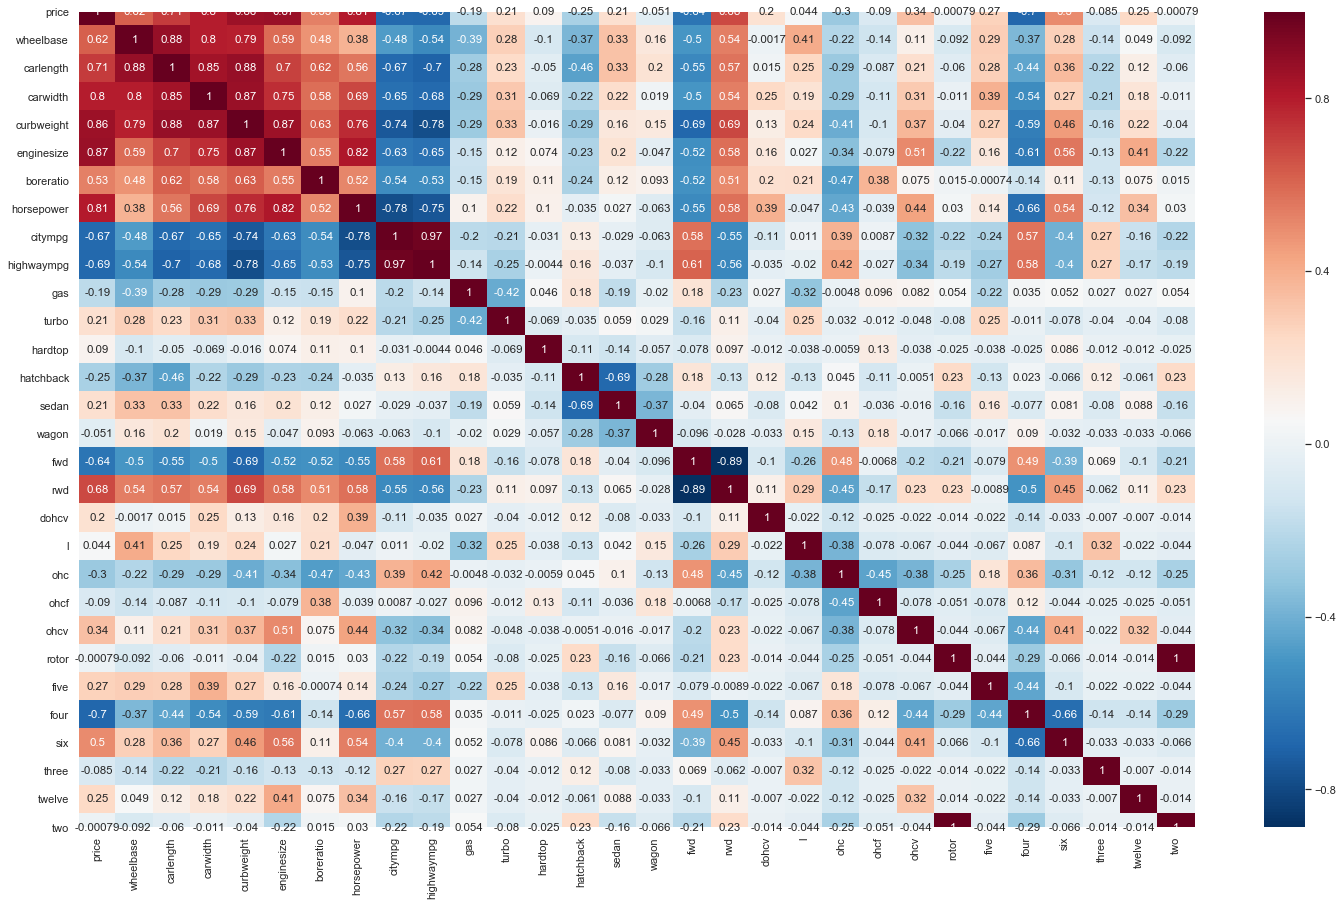

In [350]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,15))
sns.heatmap(df_train.corr(), annot = True, cmap="RdBu_r", annot_kws={"size": 11.5})
plt.show()

The price is highly correlated with `horsepower`, `enginesize`, `curbweight`, `carwidth` and `carlength`

#### Dividing into X and Y sets for model building

In [351]:
y_train = df_train.pop('price') 
X_train = df_train

## Step 5: Building the Model
We will build the model using **RFE** (Recursive Feature Elimination)

In [352]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [353]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [354]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', True, 1),
 ('carlength', False, 8),
 ('carwidth', False, 9),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 12),
 ('horsepower', True, 1),
 ('citympg', False, 11),
 ('highwaympg', True, 1),
 ('gas', False, 18),
 ('turbo', False, 19),
 ('hardtop', False, 5),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 20),
 ('rwd', False, 10),
 ('dohcv', False, 2),
 ('l', False, 16),
 ('ohc', False, 7),
 ('ohcf', False, 6),
 ('ohcv', False, 13),
 ('rotor', False, 17),
 ('five', False, 4),
 ('four', True, 1),
 ('six', False, 3),
 ('three', False, 15),
 ('twelve', True, 1),
 ('two', False, 14)]

In [355]:
#columns that are significant and should be included
col = X_train.columns[rfe.support_]
col

Index(['wheelbase', 'curbweight', 'enginesize', 'horsepower', 'highwaympg',
       'hatchback', 'sedan', 'wagon', 'four', 'twelve'],
      dtype='object')

In [356]:
# columns that are insignificant
X_train.columns[~rfe.support_]

Index(['carlength', 'carwidth', 'boreratio', 'citympg', 'gas', 'turbo',
       'hardtop', 'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor',
       'five', 'six', 'three', 'two'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [357]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [358]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe

,const,wheelbase,curbweight,enginesize,horsepower,highwaympg,hatchback,sedan,wagon,four,twelve
122,1.0,0.244828,0.272692,0.139623,0.083333,0.567568,0,1,0,1,0
125,1.0,0.272414,0.500388,0.339623,0.395833,0.270270,1,0,0,1,0
166,1.0,0.272414,0.314973,0.139623,0.266667,0.324324,1,0,0,1,0
1,1.0,0.068966,0.411171,0.260377,0.262500,0.270270,0,0,0,1,0
199,1.0,0.610345,0.647401,0.260377,0.475000,0.135135,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
87,1.0,0.334483,0.354926,0.184906,0.283333,0.351351,0,1,0,1,0
103,1.0,0.475862,0.609775,0.452830,0.433333,0.216216,0,1,0,0,0
67,1.0,0.806897,0.786268,0.460377,0.312500,0.216216,0,1,0,0,0
24,1.0,0.244828,0.185803,0.109434,0.083333,0.567568,1,0,0,1,0


In [359]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

# summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     82.00
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.19e-51
Time:                        23:26:28   Log-Likelihood:                 158.21
No. Observations:                 143   AIC:                            -294.4
Df Residuals:                     132   BIC:                            -261.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0280      0.061      0.462      0.645      -0.092       0.148
wheelbase      0.1405      0.076      1.839      0.068      -0.011       0.292
curbweight     0.3211      0.124      2.596      0.010       0.076       0.566
enginesize     0.2954      0.129      2.297      0.023       0.041       0.550
horsepower     0.3538      0.102      3.470      0.001       0.152       0.555
highwaympg     0.1083      0.070      1.543      0.125      -0.031       0.247
hatchback     -0.1364      0.038     -3.610      0.000      -0.211      -0.062
sedan         -0.1060      0.039     -2.741      0.007      -0.183      -0.029
wagon         -0.1531      0.042     -3.615      0.000      -0.237      -0.069
four          -0.0969      0.022     -4.339      0.000      -0.141      -0.053
twelve        -0.0610      0.100     -0.609      0.543      -0.259       0.137
==============================================================================
Omnibus:                       24.873   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.422
Skew:                           0.386   Prob(JB):                     1.93e-26
Kurtosis:                       7.391   Cond. No.                         38.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`twelve` is not significant. It can be dropped.

In [360]:
X_train_new = X_train_rfe.drop(["twelve"], axis = 1)

In [361]:
# Building and running a model again without twelve
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     91.50
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.45e-52
Time:                        23:26:51   Log-Likelihood:                 158.01
No. Observations:                 143   AIC:                            -296.0
Df Residuals:                     133   BIC:                            -266.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0336      0.060      0.562      0.575      -0.085       0.152
wheelbase      0.1461      0.076      1.932      0.056      -0.004       0.296
curbweight     0.3325      0.122      2.725      0.007       0.091       0.574
enginesize     0.2638      0.117      2.247      0.026       0.032       0.496
horsepower     0.3517      0.102      3.460      0.001       0.151       0.553
highwaympg     0.1107      0.070      1.584      0.116      -0.028       0.249
hatchback     -0.1403      0.037     -3.775      0.000      -0.214      -0.067
sedan         -0.1105      0.038     -2.919      0.004      -0.185      -0.036
wagon         -0.1585      0.041     -3.840      0.000      -0.240      -0.077
four          -0.0989      0.022     -4.489      0.000      -0.143      -0.055
==============================================================================
Omnibus:                       27.239   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.160
Skew:                           0.474   Prob(JB):                     8.98e-29
Kurtosis:                       7.558   Cond. No.                         36.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`highwaymog` is insignificant so dropping it.

In [362]:
# Building new model without highwaympg

X_train_lm = X_train_lm.drop(["highwaympg"], axis = 1)

X_train_lm = sm.add_constant(X_train_lm)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     101.5
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.77e-53
Time:                        23:27:00   Log-Likelihood:                 156.68
No. Observations:                 143   AIC:                            -295.4
Df Residuals:                     134   BIC:                            -268.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0929      0.047      1.983      0.049       0.000       0.186
wheelbase      0.1391      0.076      1.832      0.069      -0.011       0.289
curbweight     0.2659      0.115      2.309      0.022       0.038       0.494
enginesize     0.3302      0.110      2.995      0.003       0.112       0.548
horsepower     0.2829      0.092      3.061      0.003       0.100       0.466
hatchback     -0.1307      0.037     -3.546      0.001      -0.204      -0.058
sedan         -0.1015      0.038     -2.695      0.008      -0.176      -0.027
wagon         -0.1506      0.041     -3.654      0.000      -0.232      -0.069
four          -0.0947      0.022     -4.304      0.000      -0.138      -0.051
==============================================================================
Omnibus:                       26.877   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.425
Skew:                           0.500   Prob(JB):                     3.17e-26
Kurtosis:                       7.325   Cond. No.                         32.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Dropping `wheelbase`.

In [363]:
# Building new model without wheelbase

X_train_lm = X_train_lm.drop(["wheelbase"], axis = 1)

X_train_lm = sm.add_constant(X_train_lm)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     113.5
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.23e-53
Time:                        23:27:24   Log-Likelihood:                 154.91
No. Observations:                 143   AIC:                            -293.8
Df Residuals:                     135   BIC:                            -270.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0799      0.047      1.712      0.089      -0.012       0.172
curbweight     0.4252      0.076      5.583      0.000       0.275       0.576
enginesize     0.3151      0.111      2.842      0.005       0.096       0.534
horsepower     0.2098      0.084      2.495      0.014       0.044       0.376
hatchback     -0.1081      0.035     -3.085      0.002      -0.177      -0.039
sedan         -0.0714      0.034     -2.089      0.039      -0.139      -0.004
wagon         -0.1285      0.040     -3.233      0.002      -0.207      -0.050
four          -0.0941      0.022     -4.241      0.000      -0.138      -0.050
==============================================================================
Omnibus:                       25.848   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.284
Skew:                           0.502   Prob(JB):                     2.26e-23
Kurtosis:                       7.061   Cond. No.                         27.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [364]:
X_train_lm.columns

Index(['const', 'curbweight', 'enginesize', 'horsepower', 'hatchback', 'sedan',
       'wagon', 'four'],
      dtype='object')

CHecking the VIF

In [365]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,43.89
2,enginesize,5.88
5,sedan,5.86
4,hatchback,5.57
1,curbweight,5.17
3,horsepower,3.87
6,wagon,3.66
7,four,1.90


`enginesize` has higher VIF hence dropping it.

In [366]:
X_train_lm = X_train_lm.drop(["enginesize"], axis = 1)

In [367]:
X_train_lm = sm.add_constant(X_train_lm)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     124.6
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           9.41e-53
Time:                        23:28:04   Log-Likelihood:                 150.75
No. Observations:                 143   AIC:                            -287.5
Df Residuals:                     136   BIC:                            -266.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0947      0.048      1.990      0.049       0.001       0.189
curbweight     0.5600      0.061      9.162      0.000       0.439       0.681
horsepower     0.3102      0.078      3.961      0.000       0.155       0.465
hatchback     -0.1257      0.035     -3.553      0.001      -0.196      -0.056
sedan         -0.0811      0.035     -2.327      0.021      -0.150      -0.012
wagon         -0.1562      0.040     -3.951      0.000      -0.234      -0.078
four          -0.0970      0.023     -4.268      0.000      -0.142      -0.052
==============================================================================
Omnibus:                       28.504   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.725
Skew:                           0.642   Prob(JB):                     1.34e-22
Kurtosis:                       6.906   Cond. No.                         18.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Checking the VIF values

In [368]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,43.34
4,sedan,5.80
3,hatchback,5.39
5,wagon,3.45
2,horsepower,3.19
1,curbweight,3.17
6,four,1.89


`sedan` has high VIF value. Dropping it

In [369]:
X_train_lm = X_train_lm.drop(["sedan"], axis = 1)

In [370]:
X_train_lm = sm.add_constant(X_train_lm)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     143.8
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.04e-52
Time:                        23:28:29   Log-Likelihood:                 147.96
No. Observations:                 143   AIC:                            -283.9
Df Residuals:                     137   BIC:                            -266.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0178      0.035      0.512      0.609      -0.051       0.087
curbweight     0.5443      0.062      8.819      0.000       0.422       0.666
horsepower     0.3424      0.078      4.373      0.000       0.188       0.497
hatchback     -0.0536      0.017     -3.091      0.002      -0.088      -0.019
wagon         -0.0812      0.023     -3.489      0.001      -0.127      -0.035
four          -0.0933      0.023     -4.052      0.000      -0.139      -0.048
==============================================================================
Omnibus:                       28.785   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.255
Skew:                           0.690   Prob(JB):                     9.27e-21
Kurtosis:                       6.685   Cond. No.                         17.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [371]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,22.46
1,curbweight,3.13
2,horsepower,3.09
5,four,1.89
3,hatchback,1.25
4,wagon,1.16


All the variables seems significant and there are no variables with high VIF value (>5).
So moving on to prediction with these variables.

## Residual Analysis of the train data
Checking if the error terms are normally distributed

In [372]:
lm = sm.OLS(y_train,X_train_lm).fit()
y_train_price = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

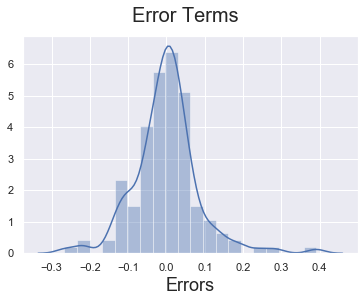

In [373]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Error terms are normally distributed.

## Step 6: Making Predictions
#### Applying the scaling on the test sets


In [374]:
# Apply scaler() to all the columns except the 'dummy' variables
num = ['float64', 'int64']
num_var = car_lr.select_dtypes(include=num).columns.tolist()
print(num_var)
df_test[num_var] = scaler.fit_transform(df_test[num_var])

['price', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg']


#### Dividing test sets into X and Y

In [375]:
y_test = df_test.pop('price')
X_test = df_test

In [376]:
# using our model to make predictions.
X_train_new = X_train_lm.drop('const',axis=1)

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [377]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Evaluation of test data via comparison of y_pred and y_test


In [378]:
from sklearn.metrics import r2_score # calculate the R-squared score on the test set.
r2_score(y_test, y_pred)

0.7634982308283622

Plotting the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

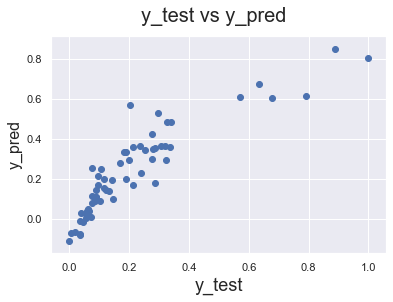

In [379]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)               
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)    

In [380]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     143.8
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.04e-52
Time:                        23:30:39   Log-Likelihood:                 147.96
No. Observations:                 143   AIC:                            -283.9
Df Residuals:                     137   BIC:                            -266.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0178      0.035      0.512      0.609      -0.051       0.087
curbweight     0.5443      0.062      8.819      0.000       0.422       0.666
horsepower     0.3424      0.078      4.373      0.000       0.188       0.497
hatchback     -0.0536      0.017     -3.091      0.002      -0.088      -0.019
wagon         -0.0812      0.023     -3.489      0.001      -0.127      -0.035
four          -0.0933      0.023     -4.052      0.000      -0.139      -0.048
==============================================================================
Omnibus:                       28.785   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.255
Skew:                           0.690   Prob(JB):                     9.27e-21
Kurtosis:                       6.685   Cond. No.                         17.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared from our model summary `(84%)` and r2 score `(76.35)` are almost similar. Hence, the predicted model is good.